## Where do most sightings occur? Are they more common in certain states?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Import data and drop unnecessary "Unnamed: 0" column
data = pd.read_csv("output/clean_data.csv")
display(data.head())

,city,state,year,month,day,hour,minute,converted_timestamp,shape
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,light
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,circle
2,Peoria,NY,2009,3,15,18,0,2009-03-15 18:00:00,cigar
3,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,disk
4,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,circle


In [3]:
# Create a new dataframe using value_counts() to get the number of times each state shows up in the data
state = pd.DataFrame(data["state"].value_counts()).reset_index()
state = state.rename(columns={state.columns[0]:"state", state.columns[1]:"count"})

# Save to .csv file for Tableau heatmap
state.to_csv("output/sightings_by_state.csv", index=False)

display(state.head())

,state,count
0,CA,8609
1,FL,4734
2,WA,3389
3,NY,3077
4,TX,3073


In [4]:
# Importing census data
populations = pd.read_csv("resources/census_data_19702020.csv")

# Merge average population for each state with state dataframe
state = pd.merge(state, populations[["state", "average_pop"]], how="left", on="state")

# Find number of sightings per hundred thousand residents
state["count_per_hundthous"] = (state["count"]/state["average_pop"])*100000

# Save to .csv file for Tableau heatmap
state.to_csv("output/sightings_by_hundthous.csv", index=False)

display(state)

,state,count,average_pop,count_per_hundthous
0,CA,8609,3.067415e+07,28.065980
1,FL,4734,1.429926e+07,33.106605
2,WA,3389,5.455326e+06,62.122771
3,NY,3077,1.872355e+07,16.433849
4,TX,3073,1.959255e+07,15.684531
5,PA,2767,1.225426e+07,22.579897
6,AZ,2604,4.471416e+06,58.236590
7,OH,2433,1.116431e+07,21.792661
8,IL,2271,1.200559e+07,18.916191
9,NC,2217,7.602774e+06,29.160408


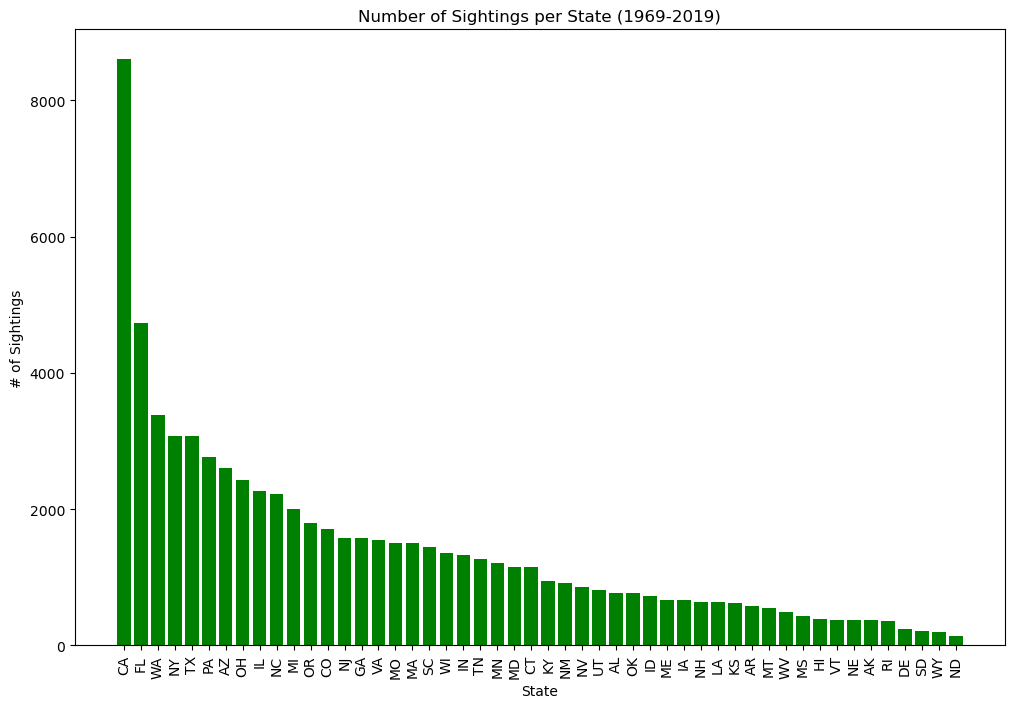

In [5]:
# Create a bar chart to show sightings per state from 1969 to 2019

# Set x and y axis variables to their corresponding column in the state dataframe
x_axis = state["state"]
y_axis = state["count"]

# Create the bar chart using plt.bar()
fig = plt.figure(figsize=(12, 8))
plt.bar(x_axis, y_axis, color='g')
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize = 10)
plt.title("Number of Sightings per State (1969-2019)")
plt.xlabel("State")
plt.ylabel("# of Sightings")
plt.savefig("visuals/sightings_per_state_bar.png")
plt.show()

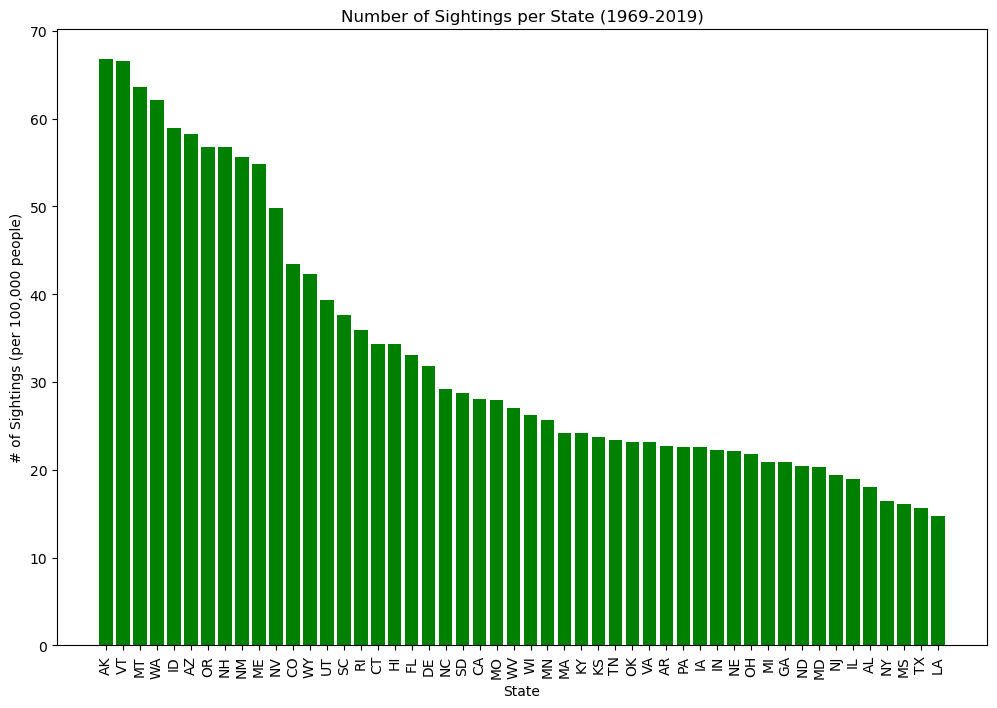

In [6]:
state = state.sort_values("count_per_hundthous", ascending = False)

# Create a bar chart showing the number of sightings by state per 100,000 residents
x_axis = state["state"]
y_axis = state["count_per_hundthous"]
fig = plt.figure(figsize=(12, 8))
plt.bar(x_axis, y_axis, color='g')
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize = 10)
plt.title("Number of Sightings per State (1969-2019)")
plt.xlabel("State")
plt.ylabel("# of Sightings (per 100,000 people)")
plt.savefig("visuals/sightings_per_hundthous_state_bar.png")
plt.show()

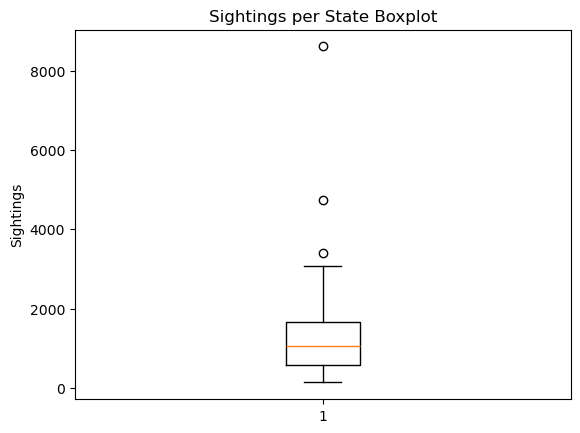

In [7]:
# Boxplot w/ original data, no populations included -- idk if we want to keep either of these boxplots
plt.boxplot(state["count"])
plt.ylabel("Sightings")
plt.title("Sightings per State Boxplot")
plt.savefig("visuals/sightings_per_state_box.png")
plt.show()

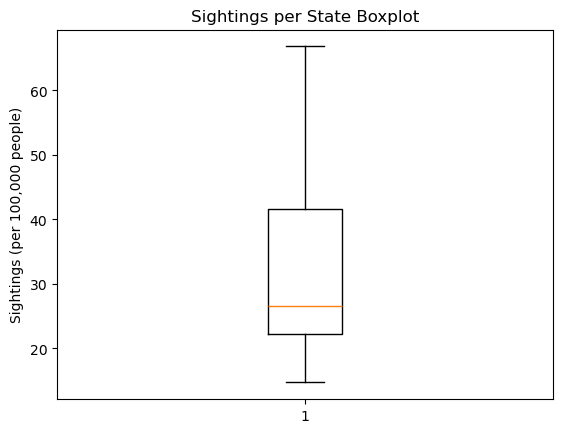

In [8]:
# Boxplot with populations factored in
plt.boxplot(state["count_per_hundthous"])
plt.ylabel("Sightings (per 100,000 people)")
plt.title("Sightings per State Boxplot")
plt.savefig("visuals/sightings_per_hundthous_state_box.png")
plt.show()

The r-value is: 0.15289114405031276


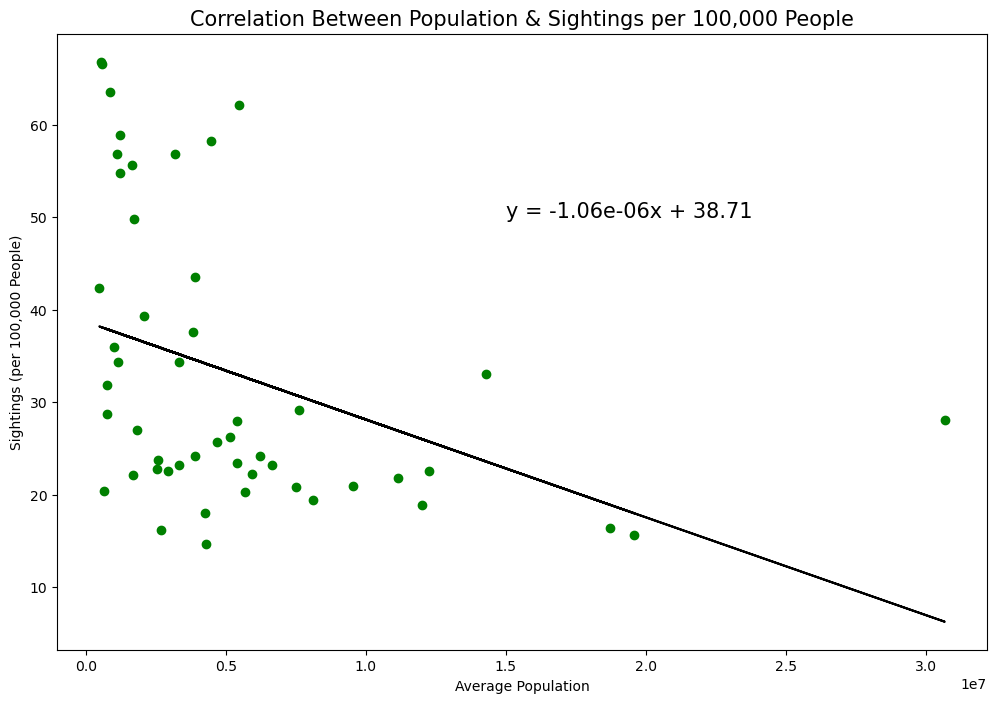

In [9]:
# Use the data on average population from 1969 to 2019 and the sightings per 100,00 people to create a linear regression.
fig = plt.figure(figsize=(12, 8))

x_values = state["average_pop"]
y_values = state["count_per_hundthous"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 8)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color = "green")
plt.plot(x_values, regress_values, color = "black")

plt.ylabel("Sightings (per 100,000 People)")
plt.xlabel("Average Population")
plt.title("Correlation Between Population & Sightings per 100,000 People", fontsize=15)

plt.annotate(line_eq, (15000000, 50), fontsize = 15, color = "black")

print(f"The r-value is: {rvalue**2}")

plt.savefig("visuals/sighting_population_correlation.png")

plt.show()